<a href="https://colab.research.google.com/github/Reyhaneh2001/HandwrittenDigitClassificationwithCNN/blob/main/HandwrittenDigitClassificationwithCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
sns.set(style="whitegrid")

digits = load_digits()
X = digits.images
y = digits.target

print("Original shape:", X.shape)  # (1797, 8, 8)

# Preprocess the data
X_resized = np.array([tf.image.resize(img[..., np.newaxis], (32, 32)).numpy() for img in X])
X_resized = X_resized / 16.0  # normalize (original pixels in 0–16)

X_train, X_test, y_train, y_test = train_test_split(X_resized, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)


Original shape: (1797, 8, 8)
Train shape: (1437, 32, 32, 1)


# **Build** **and** **compile** **model**

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 digits (0–9)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,146 (1.20 MB)

 Trainable params: 315,146 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

# **Train** **Model**

In [ ]:
history = model.fit(X_train, y_train, epochs=15, validation_split=0.1, batch_size=32)

Epoch 1/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.5057 - loss: 1.7387 - val_accuracy: 0.8611 - val_loss: 0.4459
Epoch 2/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.8840 - loss: 0.3583 - val_accuracy: 0.9375 - val_loss: 0.1971
Epoch 3/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9614 - loss: 0.1391 - val_accuracy: 0.9514 - val_loss: 0.1613
Epoch 4/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9694 - loss: 0.0967 - val_accuracy: 0.9375 - val_loss: 0.1637
Epoch 5/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9710 - loss: 0.0784 - val_accuracy: 0.9444 - val_loss: 0.1349
Epoch 6/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9847 - loss: 0.0483 - val_accuracy: 0.9444 - val_loss: 0.1393
Epoch 7/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9937 - loss: 0.0262 - val_accuracy: 0.9583 - val_loss: 0.1276
Epoch 8/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9989 - loss: 0.0162 - val_accuracy: 0.9583 - v

# **Plot Training & Validation Curves**

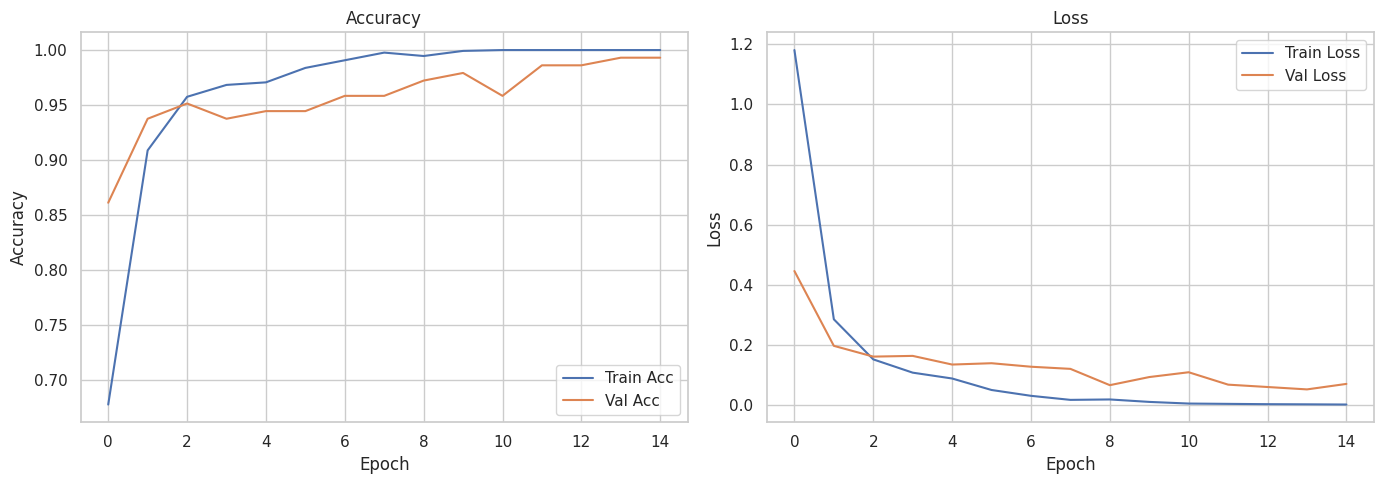

In [ ]:
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# **Evaluate with Classification Report & Confusion Matrix**

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.92      0.97      0.95        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.95      1.00      0.97        36
           5       1.00      1.00      1.00        37
           6       1.00      0.94      0.97        36
           7       1.00      1.00      1.00        36
           8       0.97      0.94      0.96        35
           9       1.00      1.00      1.00        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



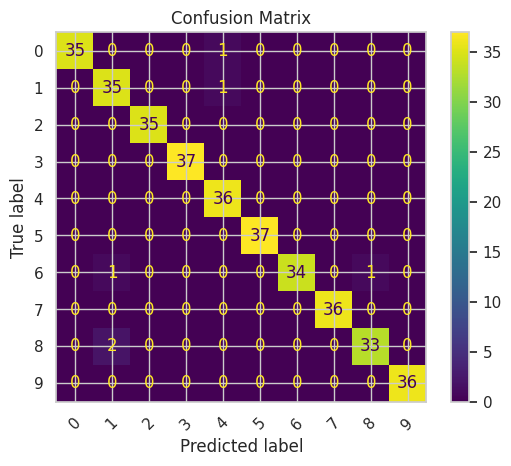

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=1)

print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap='viridis', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

# **Per-class** **accuracy**

<ipython-input-8-64276496c31f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=class_accuracies, palette="viridis")


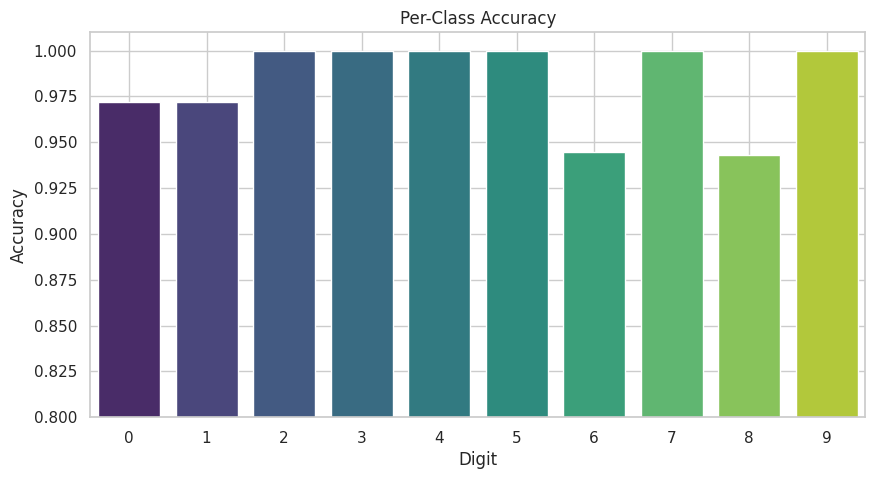

In [ ]:
class_accuracies = []
classes = np.unique(y_test)

for digit in classes:
    idx = (y_test == digit)
    acc = accuracy_score(y_test[idx], y_pred[idx])
    class_accuracies.append(acc)

plt.figure(figsize=(10, 5))
sns.barplot(x=classes, y=class_accuracies, palette="viridis")
plt.title("Per-Class Accuracy")
plt.xlabel("Digit")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.01)
plt.grid(True)
plt.show()

# **Plot** **Most** **Confused** **Classes**

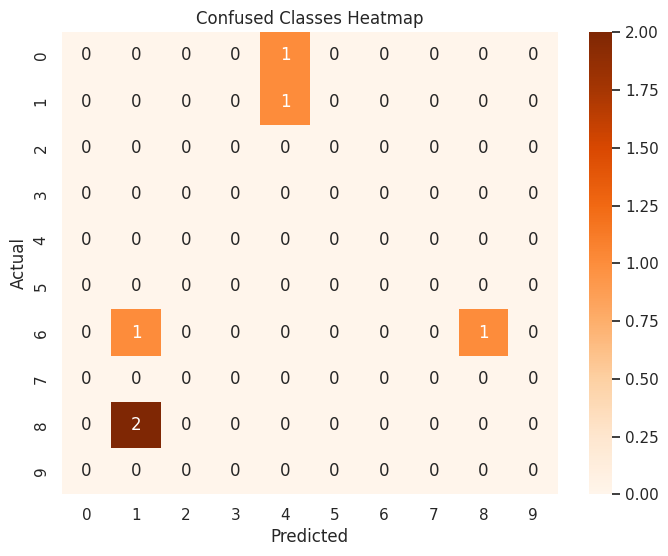

In [ ]:
conf = confusion_matrix(y_test, y_pred)
np.fill_diagonal(conf, 0)
conf_df = pd.DataFrame(conf, index=classes, columns=classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, fmt='d', cmap="Oranges")
plt.title("Confused Classes Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Show a Grid of Wrong Predictions**

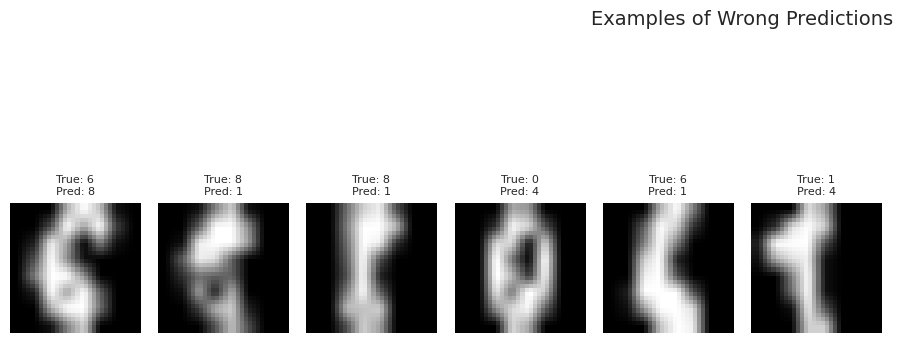

In [ ]:
wrong_idx = np.where(y_pred != y_test)[0]

plt.figure(figsize=(15, 5))
for i, idx in enumerate(wrong_idx[:10]):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_test[idx].reshape(32, 32), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}", fontsize=8)
    plt.axis("off")
plt.suptitle("Examples of Wrong Predictions", fontsize=14)
plt.tight_layout()
plt.show()

# **Plot Prediction Probabilities for a Sample**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


<ipython-input-11-fcfc60c03a72>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(10), y=probs, palette="coolwarm")


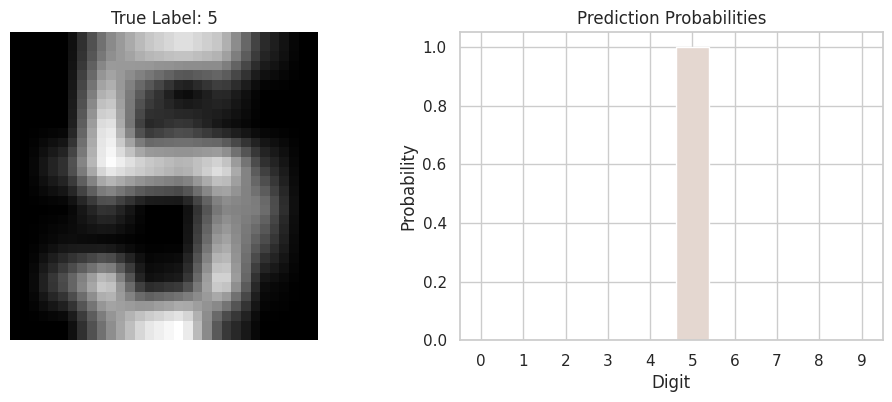

In [ ]:
sample_idx = 0
probs = model.predict(X_test[sample_idx][np.newaxis, ...])[0]

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(X_test[sample_idx].reshape(32, 32), cmap='gray')
plt.title(f"True Label: {y_test[sample_idx]}")
plt.axis("off")

plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(10), y=probs, palette="coolwarm")
plt.title("Prediction Probabilities")
plt.xlabel("Digit")
plt.ylabel("Probability")
plt.ylim(0, 1.05)
plt.grid(True)
plt.show()